# Lasso回帰

## CD法による
めっちゃ参考にした↓
http://satopirka.com/2017/10/lasso%E3%81%AE%E7%90%86%E8%AB%96%E3%81%A8%E5%AE%9F%E8%A3%85--%E3%82%B9%E3%83%91%E3%83%BC%E3%82%B9%E3%81%AA%E8%A7%A3%E3%81%AE%E6%8E%A8%E5%AE%9A%E3%82%A2%E3%83%AB%E3%82%B4%E3%83%AA%E3%82%BA%E3%83%A0-/

## LARSも別に実装するそのうち


(500,)
(500, 1)


C:\Users\033041004\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


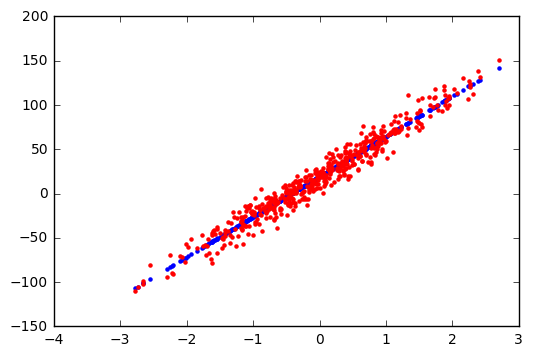

In [1]:
# import cells
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression

class LassoRegressor(object):
    def __init__(self, lam=0.1, max_iter=1000):
        self.lam = lam
        self.max_iter = max_iter
        self.w = None
        
    def addBias(self, x):
        b = np.ones(x.shape[0])
        v = np.column_stack((b, x))
        return v
    
    def softThreash(self, a, b):
        # 常にb>=0だと思ってる
        if a > 0 and b < abs(a):
            return a - b
        elif a < 0 and b < abs(a):
            return a + b
        else:
            return 0
    
    def fit(self, x, y):
        X = self.addBias(x)
        w = np.zeros(X.shape[1])
        w[0] = np.sum((y - np.dot(X[:, 1:], w[1:]))) / X.shape[0]
        
        for iter in range(self.max_iter):
            # w[1:]
            for j in range(1, X.shape[1]):
                # ここ技巧的
                temp = deepcopy(w)
                temp[j] = 0
                val1 = y - np.dot(X, temp)
                val2 = np.dot(X[:, j], val1)
                val3 = self.lam * X.shape[0]
                numerator = np.dot(X[:, j], X[:, j])
                denominator = self.softThreash(val2, val3)
                w[j] = denominator / numerator
                
            # w[0]
            w[0] = np.sum((y - np.dot(X[:, 1:], w[1:]))) / X.shape[0]
        self.w = w
            
    def predict(self, x):
        X = self.addBias(x)
        ret = [np.dot(self.w, v) for v in X]
        return np.array(ret)

    def score(self, x, y):
        pass


# fit 
x, y = make_regression(n_samples=500, n_features=1, random_state=0, noise=10.0, bias=20.0)
clf = LassoRegressor()
clf.fit(x, y)

# show
pred = clf.predict(x)
print(pred.shape)
print(x.shape)
plt.scatter(x, pred, color='blue', marker='.')
plt.scatter(x, y, color='red', marker='.')
plt.show()

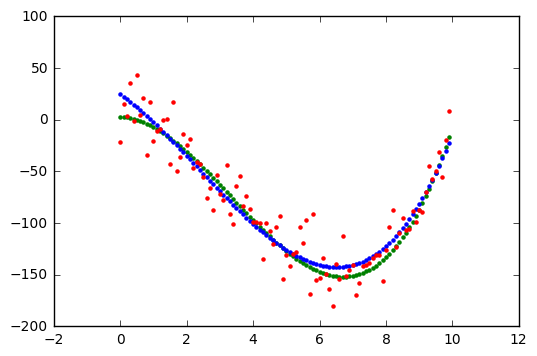

In [51]:
# 多項式
## y = x^3 - 10x^2 - x + 3
import numpy as np
import matplotlib.pyplot as plt

def getPoly(val):
    return val**3 - 10.0 * val**2 - val + 3.0

# prepare
dim = 3
ar = np.arange(0, 10, 0.1)
trueY = np.array([getPoly(val) for val in ar])
y = np.array([getPoly(val)+np.random.normal(0, 20.0) if (val>0.5 and val < 9.5) else getPoly(val)+np.random.normal(0, 30) for val in ar])
x = np.array([[val**k for k in range(1, dim+1)] for val in ar]).reshape(-1, dim)

# fit
clf = LassoRegressor()
clf.fit(x, y)

# show
pred = clf.predict(x)
plt.scatter(ar, trueY, color='green', marker='.')
plt.scatter(ar, pred, color='blue', marker='.')
plt.scatter(ar, y, color='red', marker='.')
plt.show()